In [1]:
# Question 4
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

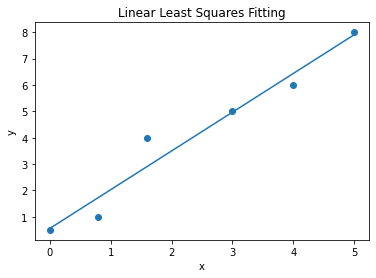

[0.55543634 1.46995708]


In [2]:
#a)
x = np.array([[1, 1, 1, 1, 1, 1], [0, 0.8, 1.6, 3, 4.0, 5.0]]) # Input data
d = np.array([0.5, 1, 4, 5, 6, 8]) # True output data
x = x.T
w_LLS = np.dot(inv(np.dot(x.T,x)),np.dot(x.T,d))

i = np.arange(0, 6)
j = w_LLS[1]*i + w_LLS[0] # Predicted output data
plt.scatter(x[:,1], d)
plt.plot(i, j)
plt.title("Linear Least Squares Fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
print(w_LLS)

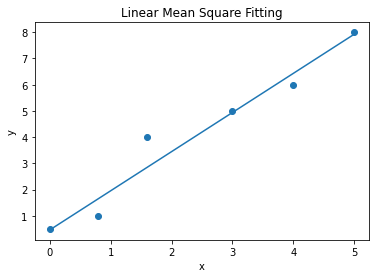

[0.45853975 1.49290749]


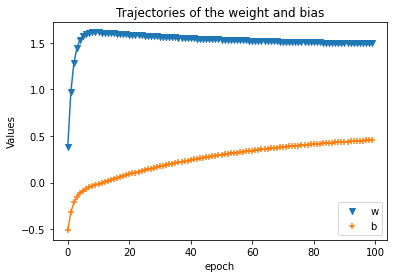

In [3]:
#b)
#b-1) Fitting Graph
lr = 0.01
epochs = 100
w_LMS = np.random.randn(1,x.shape[1]).flatten()
w_track = []
b_track = []

for i in range(epochs):
    w_track.append(w_LMS[1])
    b_track.append(w_LMS[0])
    for j, label in enumerate(d):
        e = d[j] - np.dot(x[j, :],w_LMS)
        w_LMS = w_LMS + lr * e * x[j]
        
i = np.arange(0, 6)
j = w_LMS[1]*i + w_LMS[0]
plt.scatter(x[:,1], d)
plt.plot(i, j)
plt.title("Linear Mean Square Fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
print(w_LMS)

#b-2) Trajectories
epc = np.array(range(epochs))
plt.scatter(epc,w_track, label = 'w', marker = 'v')
plt.plot(epc,w_track)
plt.scatter(epc,b_track, label = 'b', marker = '+')
plt.plot(epc,b_track)
plt.title('Trajectories of the weight and bias')
plt.xlabel("epoch")
plt.ylabel("Values")
plt.legend()
plt.show()

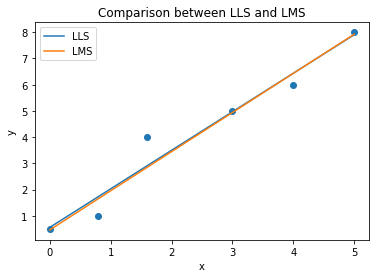

In [4]:
#c)
i = np.arange(0, 6)
LLS = w_LLS[1]*i + w_LLS[0]
LMS = w_LMS[1]*i + w_LMS[0]
plt.scatter(x[:,1], d)
plt.plot(i, LLS)
plt.plot(i, LMS)
plt.legend(['LLS','LMS'])
plt.title("Comparison between LLS and LMS")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<ipython-input-5-535f60c7ddcd>:15: RuntimeWarning: overflow encountered in multiply
  w_LMS = w_LMS + lr_new*e*x[j]


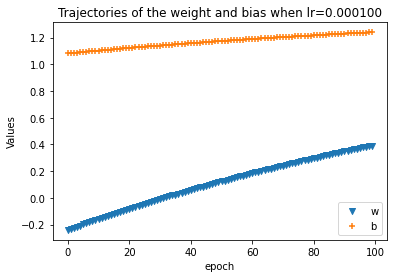

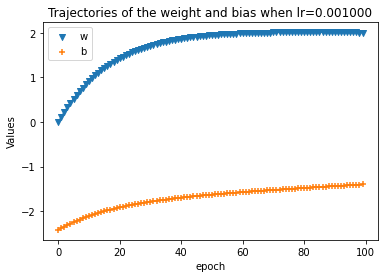

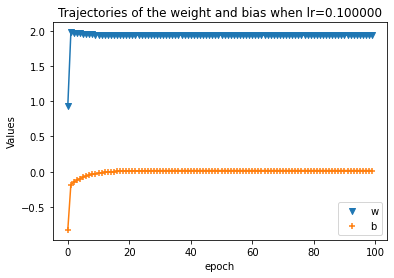

C:\Users\wlsgn\anaconda3\lib\site-packages\matplotlib\ticker.py:2247: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


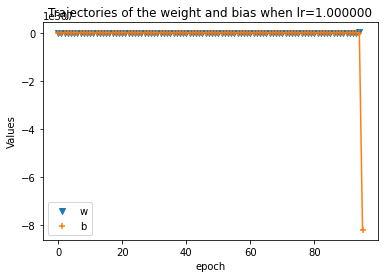

In [5]:
#d)
#b-1) Fitting Graph
lr_multi = [0.0001, 0.001, 0.1, 1]
epochs = 100
w_track = np.zeros([len(lr_multi),epochs])
b_track = np.zeros([len(lr_multi),epochs])

for order, lr_new in enumerate(lr_multi):
    w_LMS = np.random.randn(1,x.shape[1]).flatten()
    for i in range(epochs):
        w_track[order, i] = w_LMS[1]
        b_track[order, i] = w_LMS[0]
        for j, label in enumerate(d):
            e = d[j] - np.dot(x[j, :],w_LMS)
            w_LMS = w_LMS + lr_new*e*x[j]
    
        
#b-2) Trajectories
epc = np.array(range(epochs))
for i, lr in enumerate(lr_multi):
    plt.scatter(epc,w_track[i,:], label = 'w', marker = 'v')
    plt.plot(epc,w_track[i,:])
    plt.scatter(epc,b_track[i,:], label = 'b', marker = '+')
    plt.plot(epc,b_track[i,:])
    plt.title("Trajectories of the weight and bias when lr=%1f" % lr)
    plt.xlabel("epoch")
    plt.ylabel("Values")
    plt.legend()
    plt.show()
    